###### Problem Statement
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

In [431]:
#import warnings
import warnings
warnings.filterwarnings("ignore")

In [432]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
##This command will result in static image of the plot embedded in notebook

In [433]:
#import the application_data.csv file into the notebook and displaying the first 5 data rows 
df=pd.read_csv(".//application_data.csv")
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [434]:
#CHECKING THE STRUCTURE OF DATA
print(df.shape) #displays the no. of rows and cols. in the dataset

(307511, 122)


In [435]:
df.info() #Displays details on no. of records,no. of cols,dataypes with count and memory usage(in MB)  in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [436]:
null_columns=df.columns[df.isnull().any()]  #Get the columns having null values
round(100*(df[null_columns].isnull().sum()/len(df)),2) #Percentage of null values in respective columns

AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
CNT_FAM_MEMBERS                  0.00
EXT_SOURCE_1                    56.38
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_

In [437]:
#dropping the columns having 60% or more null values
df_null = round(100*(df.isnull().sum()/len(df)),2)
df_count = df_null[df_null > 60].index
df.drop(df_count, axis=1, inplace=True)
df.shape  #Checking if the count of columns have got reduced after dropping the columns


(307511, 105)

In [438]:
null_columns=df.columns[df.isnull().any()]  #Get the columns having null values again
round(100*(df[null_columns].isnull().sum()/len(df)),2)#Shows columns having null values with null value percentage

AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
OCCUPATION_TYPE                 31.35
CNT_FAM_MEMBERS                  0.00
EXT_SOURCE_1                    56.38
EXT_SOURCE_2                     0.21
EXT_SOURCE_3                    19.83
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
LANDAREA_AVG                    59.38
LIVINGAREA_AVG                  50.19
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
LANDAREA_MODE                   59.38
LIVINGAREA_MODE                 50.19
NONLIVINGAREA_MODE              55.18
APARTMENTS_M

In [439]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [440]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [57]:
'''Missing values imputations:
AMT_REQ_CREDIT_BUREAU_HOUR----imputed with 0 as both median and mode for this column is zero and also the mean is very negligible.
In addition we can see the 99% of records have value=0
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)
df.AMT_REQ_CREDIT_BUREAU_HOUR.describe()
df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()
Same logic applies for other similar columns which has the same %age of missing values namely:
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT--Here due to presence of outliers(max -261) mean is 0.26 but still 75% records have 0.

df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace=True)--In this mannder we can replace the missing for the columns with zero.
'''

"Missing values imputations:\nAMT_REQ_CREDIT_BUREAU_HOUR----imputed with 0 as both median and mode for this column is zero and also the mean is very negligible.\nIn addition we can see the 99% of records have value=0\ndf.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)\ndf.AMT_REQ_CREDIT_BUREAU_HOUR.describe()\ndf.AMT_REQ_CREDIT_BUREAU_HOUR.mode()\nSame logic applies for other similar columns which has the same %age of missing values namely:\nAMT_REQ_CREDIT_BUREAU_DAY\nAMT_REQ_CREDIT_BUREAU_WEEK\nAMT_REQ_CREDIT_BUREAU_MON\nAMT_REQ_CREDIT_BUREAU_QRT--Here due to presence of outliers(max -261) mean is 0.26 but still 75% records have 0.\n\ndf['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace=True)--In this mannder we can replace the missing for the columns with zero.\n"

In [441]:
#Creating a new DATAFRAME(df1) from existing dataframe(df) with a subset of 25 cols
df1=df[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT',
       'AMT_ANNUITY','AMT_GOODS_PRICE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
       'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','FLAG_MOBIL','OCCUPATION_TYPE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'ORGANIZATION_TYPE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK']]
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-2120,1,Laborers,1.0,2,Business Entity Type 3,2.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,-1188,-291,1,Core staff,2.0,1,School,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-2531,1,Laborers,1.0,2,Government,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-2437,1,Laborers,2.0,2,Business Entity Type 3,0.0,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-3458,1,Core staff,1.0,2,Religion,0.0,0.0,0.0,0.0


In [442]:
df1.dtypes #DATATYPES OF ALL COLUMNS


SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
REGION_RATING_CLIENT            int64
ORGANIZATION_TYPE              object
DEF_60_CNT_SOCIAL_CIRCLE      float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
dtype: objec

In [443]:
#Add a new column for DAYS_BIRTH column name AGE and change the datatype of AGE column to int 
df1["AGE"]=df1["DAYS_BIRTH"].apply(lambda x : x/365)
df1.AGE=df1.AGE.astype(int)
df1.AGE=df1.AGE.abs()
df1.AGE


0         25
1         45
2         52
3         52
4         54
          ..
307506    25
307507    56
307508    41
307509    32
307510    46
Name: AGE, Length: 307511, dtype: int32

In [444]:
#converting the employee work days count to the number of months
df1["DAYS_EMPLOYED"] = df1["DAYS_EMPLOYED"].apply(lambda x : x/30)
df1.DAYS_EMPLOYED = df1.DAYS_EMPLOYED.astype(int)
df1.DAYS_EMPLOYED = df1.DAYS_EMPLOYED.abs()
df1.DAYS_EMPLOYED

0            21
1            39
2             7
3           101
4           101
          ...  
307506        7
307507    12174
307508      264
307509      159
307510       42
Name: DAYS_EMPLOYED, Length: 307511, dtype: int32

In [445]:
#Changing the datatype of FLAG_OWN_CAR from object to int
df1.FLAG_OWN_CAR.replace(('Y', 'N'), (1, 0), inplace=True)
print(df1.FLAG_OWN_CAR.value_counts())

0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64


In [446]:
#Changing the datatype of FLAG_OWN_REALTY from object to int
df1.FLAG_OWN_REALTY.replace(('Y', 'N'), (1, 0), inplace=True)
print(df1.FLAG_OWN_REALTY.value_counts())

1    213312
0     94199
Name: FLAG_OWN_REALTY, dtype: int64


In [447]:
df1.dtypes #Data Types of all cols

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                    int64
FLAG_OWN_REALTY                 int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int32
DAYS_ID_PUBLISH                 int64
FLAG_MOBIL                      int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
REGION_RATING_CLIENT            int64
ORGANIZATION_TYPE              object
DEF_60_CNT_SOCIAL_CIRCLE      float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AGE         

In [448]:
#Check outliers for numerical column-AMT_INCOME_TOTAL 

df1.AMT_INCOME_TOTAL.describe()



count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

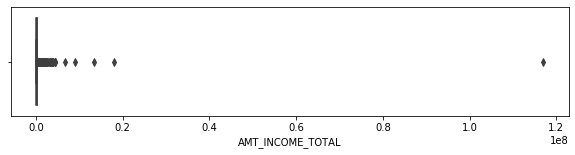

In [449]:
#PLot the boxplot
plt.figure(figsize=(10,2))
sns.boxplot(df1.AMT_INCOME_TOTAL)
plt.show()

In [450]:
df1.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99,0.995,1.00]) #from 99percentilae to Max we can say that the difference is huge and confirms that there exists outliers

0.500       147150.0
0.700       180000.0
0.900       270000.0
0.950       337500.0
0.990       472500.0
0.995       630000.0
1.000    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [451]:
df1.AMT_INCOME_TOTAL.sort_values().tail(10)#We can see that there does exist some records which has Total Income 
#which are extremely high and hence can cap them



181698      3950059.5
287463      4500000.0
187833      4500000.0
103006      4500000.0
204564      4500000.0
131127      6750000.0
77768       9000000.0
246858     13500000.0
203693     18000090.0
12840     117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [452]:
df1.AMT_INCOME_TOTAL.loc[df1.AMT_INCOME_TOTAL > 4500000.0]  = 4500000.0 #Cappimg the outliers to 4500000

In [453]:
df1.AMT_INCOME_TOTAL.sort_values().tail(10)

181698    3950059.5
203693    4500000.0
12840     4500000.0
131127    4500000.0
204564    4500000.0
187833    4500000.0
103006    4500000.0
77768     4500000.0
246858    4500000.0
287463    4500000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [454]:
df1.AMT_INCOME_TOTAL.describe() #Now max has come down to capped value

count    3.075110e+05
mean     1.683370e+05
std      1.006904e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      4.500000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

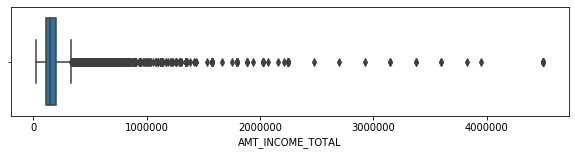

In [455]:
plt.figure(figsize=(10,2))   #plotting the boxplot again to verify that outliers has now been reduced.
sns.boxplot(df1.AMT_INCOME_TOTAL)
plt.show()

In [456]:
#Check outliers for numerical column-AMT_CREDIT
df1.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

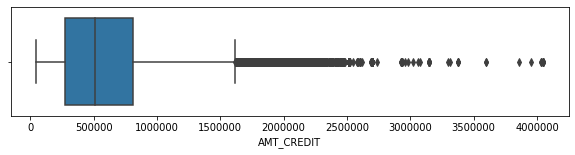

In [457]:
#PLot the boxplot
plt.figure(figsize=(10,2))
sns.boxplot(df1.AMT_CREDIT)
plt.show()

In [458]:
df1.AMT_CREDIT.quantile([0.5,0.7,0.9,0.95,0.99,0.995,1.00]) #not much spike from 99.5 percentile to max so will keep it as it is

0.500     513531.0
0.700     755190.0
0.900    1133748.0
0.950    1350000.0
0.990    1854000.0
0.995    2022565.5
1.000    4050000.0
Name: AMT_CREDIT, dtype: float64

In [459]:
#Bining the values for COLUMN=AGE
df1.AGE.describe()


count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

In [460]:
bins=[10,19,29,39,49,59,69]
df1['AGE_BINNED']=pd.cut(x=df1['AGE'],bins=bins)

In [461]:
df1['AGE_BINNED'].value_counts()

(29, 39]    82299
(39, 49]    76543
(49, 59]    68074
(19, 29]    45000
(59, 69]    35595
(10, 19]        0
Name: AGE_BINNED, dtype: int64

**ANALYSIS**

In [462]:
#Check Imbalance
round(100*df1.TARGET.value_counts(normalize=True),2)

0    91.93
1     8.07
Name: TARGET, dtype: float64

In [463]:
#Create first dataframe where TARGET=1 (Client with Payment diffculties)
T1=df1[df1['TARGET']==1]
T1.TARGET.describe()

count    24825.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: TARGET, dtype: float64

In [464]:
#Create second dataframe where TARGET=0(all other cases)
T0=df1[df1['TARGET']==0]
T0.TARGET.describe()

count    282686.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: TARGET, dtype: float64

**UNIVARIATE ANALYSIS**

In [465]:
#Categorical unordered variables in data set T0 and T1:
# 1-NAME_CONTRACT_TYPE: IN both the datasets T0 and T1 we found that CASH loans constitues 90% or more ofthe total loans and
#REVOLVING loans within 10%.Hence we can infer that BANKS are giving CASH LOANS more. 

T0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 28 columns):
SK_ID_CURR                    282686 non-null int64
TARGET                        282686 non-null int64
NAME_CONTRACT_TYPE            282686 non-null object
CODE_GENDER                   282686 non-null object
FLAG_OWN_CAR                  282686 non-null int64
FLAG_OWN_REALTY               282686 non-null int64
AMT_INCOME_TOTAL              282686 non-null float64
AMT_CREDIT                    282686 non-null float64
AMT_ANNUITY                   282674 non-null float64
AMT_GOODS_PRICE               282429 non-null float64
NAME_INCOME_TYPE              282686 non-null object
NAME_EDUCATION_TYPE           282686 non-null object
NAME_FAMILY_STATUS            282686 non-null object
NAME_HOUSING_TYPE             282686 non-null object
DAYS_BIRTH                    282686 non-null int64
DAYS_EMPLOYED                 282686 non-null int32
DAYS_ID_PUBLISH               282686 non-nu

In [466]:
T0.NAME_CONTRACT_TYPE.value_counts(normalize=True) #analysing type of loans

Cash loans         0.9021
Revolving loans    0.0979
Name: NAME_CONTRACT_TYPE, dtype: float64

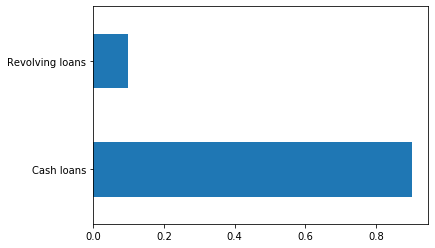

In [467]:
T0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

In [468]:
T1.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.935388
Revolving loans    0.064612
Name: NAME_CONTRACT_TYPE, dtype: float64

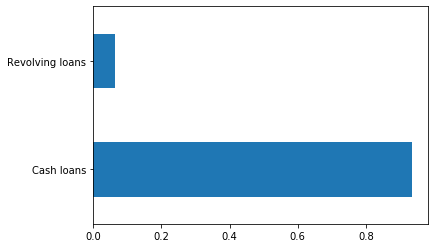

In [469]:
T1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

In [470]:
# 2-OCCUPATION_TYPE ----Analysing the source of income
#AFter looking into both the data sets we can see that trends are not similar.For Managers/Drivers we can see that in terms of
#allother cases Managers representation is more in comparison to Drivers but when it comes to likelihood
#of defaults Drivers representation is more in comparison to Managers.

T0.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.256256
Sales staff              0.150644
Core staff               0.134141
Managers                 0.104080
Drivers                  0.085661
High skill tech staff    0.055454
Accountants              0.048496
Medicine staff           0.041361
Security staff           0.031152
Cooking staff            0.027652
Cleaning staff           0.021841
Private service staff    0.012863
Low-skill Laborers       0.009004
Secretaries              0.006299
Waiters/barmen staff     0.006211
Realty agents            0.003593
HR staff                 0.002737
IT staff                 0.002555
Name: OCCUPATION_TYPE, dtype: float64

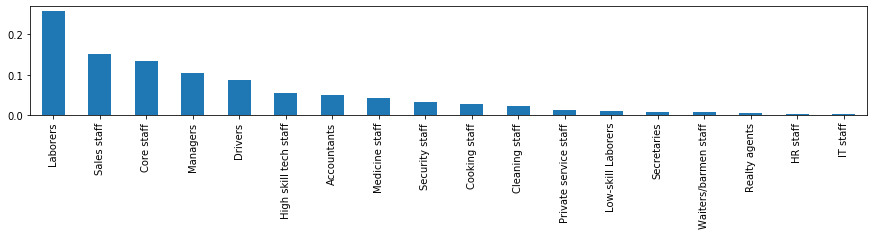

In [471]:
plt.figure(figsize=(15,2))
T0.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

In [472]:
T1.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.314768
Sales staff              0.166712
Drivers                  0.113603
Core staff               0.093708
Managers                 0.071602
Security staff           0.038928
High skill tech staff    0.037796
Cooking staff            0.033483
Medicine staff           0.030841
Accountants              0.025557
Cleaning staff           0.024101
Low-skill Laborers       0.019356
Private service staff    0.009435
Waiters/barmen staff     0.008195
Secretaries              0.004960
Realty agents            0.003181
HR staff                 0.001941
IT staff                 0.001833
Name: OCCUPATION_TYPE, dtype: float64

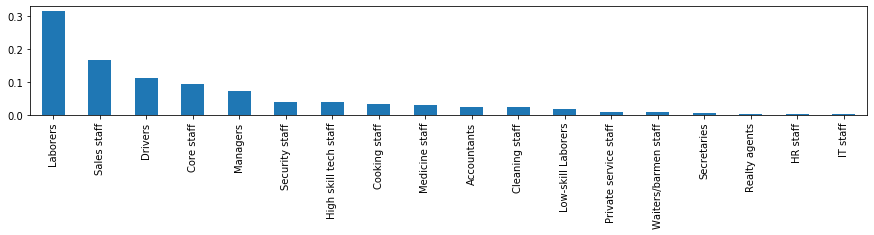

In [473]:
plt.figure(figsize=(15,2))
T1.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

In [474]:
#3-ORGANIZATION_TYPE ---Analysing the type of organization the applicants belongs to and their trend.
#If we compare XNA in T0and T1 we can infer that XNA has less representaion in defaults(12% approx) in compariosn to All 
#other cases scenario.(18% approx)
T0.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.218154
XNA                       0.185308
Self-employed             0.122058
Other                     0.054506
Medicine                  0.036988
Government                0.034236
Business Entity Type 2    0.034147
School                    0.029598
Trade: type 7             0.025084
Kindergarten              0.022626
Construction              0.020999
Business Entity Type 1    0.019446
Transport: type 4         0.017323
Industry: type 9          0.011118
Trade: type 3             0.011076
Industry: type 3          0.010365
Security                  0.010340
Housing                   0.009633
Military                  0.008840
Industry: type 11         0.008738
Bank                      0.008409
Police                    0.007867
Agriculture               0.007772
Transport: type 2         0.007188
Postal                    0.006987
Security Ministries       0.006643
Trade: type 2             0.006251
Restaurant                0.005656
Services            

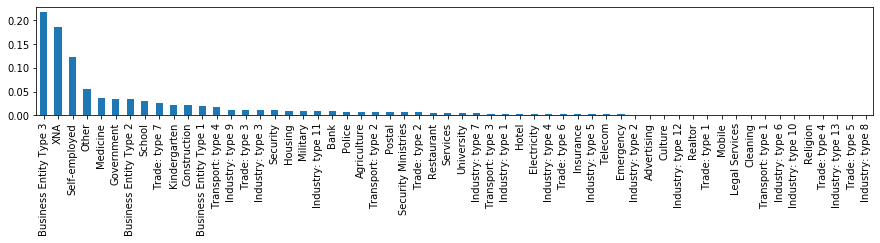

In [475]:
plt.figure(figsize=(15,2))
T0.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

In [476]:
T1.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.254703
Self-employed             0.157422
XNA                       0.120443
Other                     0.051360
Business Entity Type 2    0.036254
Construction              0.031621
Trade: type 7             0.029809
Medicine                  0.029688
Government                0.029245
School                    0.021188
Transport: type 4         0.020181
Business Entity Type 1    0.019617
Kindergarten              0.019496
Trade: type 3             0.014542
Industry: type 3          0.014018
Security                  0.013051
Agriculture               0.010352
Housing                   0.009466
Industry: type 11         0.009426
Industry: type 9          0.009063
Restaurant                0.008540
Transport: type 3         0.007533
Postal                    0.007331
Transport: type 2         0.006928
Military                  0.005438
Trade: type 2             0.005358
Bank                      0.005237
Police                    0.004713
Industry: type 1    

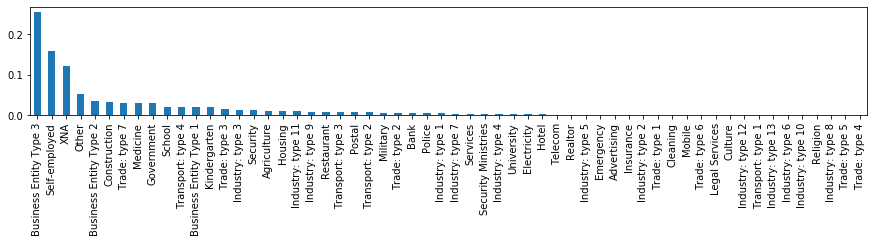

In [477]:
plt.figure(figsize=(15,2))
T1.ORGANIZATION_TYPE.value_counts(normalize=True).plot.bar()
plt.show()

In [478]:
    #4-CODE_GENDER:Between Female(F) and Male(M) We can infer that M(MALE) are more inclined towards defaults in comparison to all 
    #other cases.
T0.CODE_GENDER.value_counts(normalize=True)

F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64

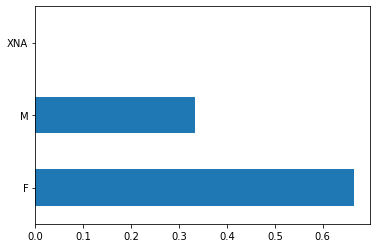

In [359]:
T0.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()

In [479]:
T1.CODE_GENDER.value_counts(normalize=True)

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

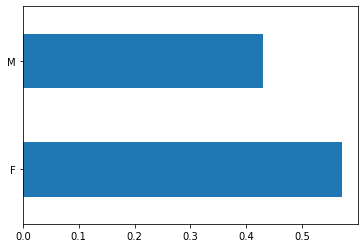

In [480]:
T1.CODE_GENDER.value_counts(normalize=True).plot.barh()
plt.show()

In [481]:
#Categorical Ordered variables in data set T0 and T1:
#5-NAME_EDUCATION_TYPE: We can infer that its the applicants with seconary/secondary special education who has highest represe-
#ntation in Defaults and in all other cases
T0.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

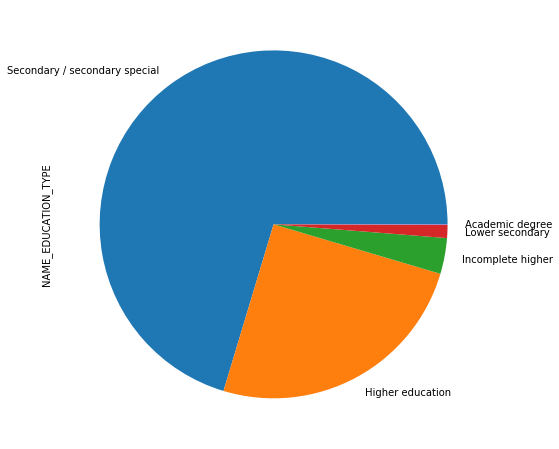

In [482]:
plt.figure(figsize=(8,8))
T0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

In [483]:
T1.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

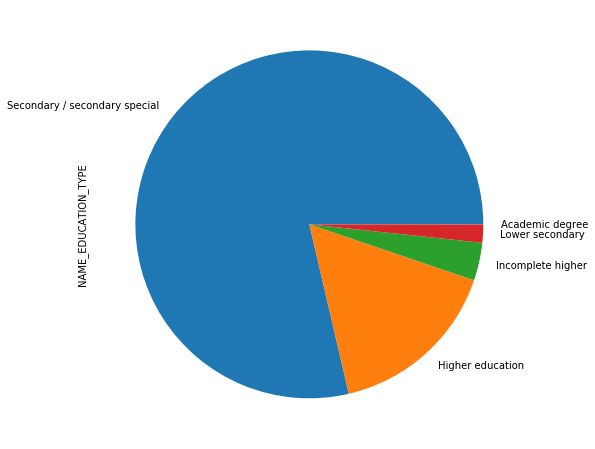

In [484]:
plt.figure(figsize=(8,8))
T1.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.show()

In [485]:
#NUmerical variables in data set T0 and T1:
#6-AMT_INCOME_TOTAL
T0.AMT_CREDIT.describe()

count    2.826860e+05
mean     6.026483e+05
std      4.068459e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.177880e+05
75%      8.100000e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

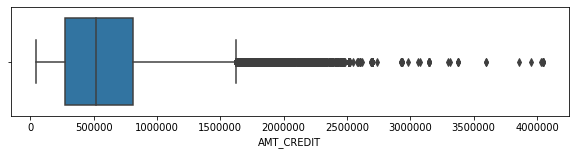

In [486]:
plt.figure(figsize=(10,2))
sns.boxplot(T0.AMT_CREDIT)
plt.show()

In [487]:
T0.AMT_CREDIT.quantile([0.5,0.7,0.9,0.95,0.99,0.995,1.00]) #from 99.5 to Max AMT_CREDIT is just doubled...

0.500     517788.0
0.700     755190.0
0.900    1157670.0
0.950    1350000.0
0.990    1886850.0
0.995    2039013.0
1.000    4050000.0
Name: AMT_CREDIT, dtype: float64

In [488]:
T1.AMT_CREDIT.describe()

count    2.482500e+04
mean     5.577785e+05
std      3.464332e+05
min      4.500000e+04
25%      2.844000e+05
50%      4.975200e+05
75%      7.333155e+05
max      4.027680e+06
Name: AMT_CREDIT, dtype: float64

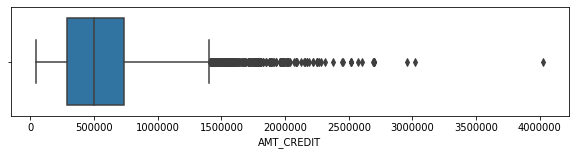

In [489]:
plt.figure(figsize=(10,2))
sns.boxplot(T1.AMT_CREDIT)
plt.show()

In [490]:
T1.AMT_CREDIT.quantile([0.5,0.7,0.9,0.95,0.99,0.995,1.00])#from 99.5 to Max AMT_CREDIT is just doubled...

0.500     497520.00
0.700     675000.00
0.900    1042560.00
0.950    1256400.00
0.990    1711340.64
0.995    1853856.90
1.000    4027680.00
Name: AMT_CREDIT, dtype: float64

In [491]:
#NUmerical variables in data set T0 and T1:
#7-AMT_ANNUITY
T0.AMT_ANNUITY.describe()

count    282674.000000
mean      27163.623349
std       14658.307178
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

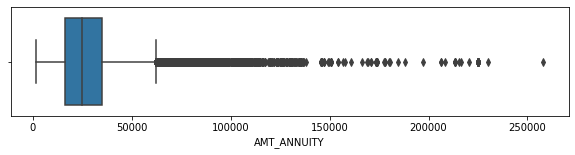

In [492]:
plt.figure(figsize=(10,2))
sns.boxplot(T0.AMT_ANNUITY)
plt.show()

In [493]:
T0.AMT_ANNUITY.quantile([0.5,0.7,0.9,0.95,0.99,0.995,1.00])#from 99.5 to Max AMT_CREDIT is three times...

0.500     24876.0
0.700     32125.5
0.900     46134.0
0.950     53455.5
0.990     70713.0
0.995     80860.5
1.000    258025.5
Name: AMT_ANNUITY, dtype: float64

In [494]:
T1.AMT_ANNUITY.describe()

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

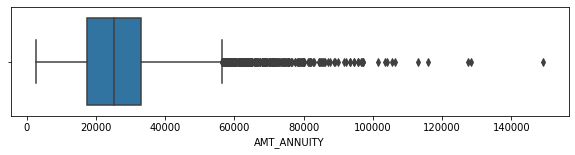

In [495]:
plt.figure(figsize=(10,2))
sns.boxplot(T1.AMT_ANNUITY)
plt.show()

In [496]:
T0.AMT_ANNUITY.quantile([0.5,0.7,0.9,0.95,0.99,0.995,1.00])#from 99.5 to Max AMT_CREDIT is three times...

0.500     24876.0
0.700     32125.5
0.900     46134.0
0.950     53455.5
0.990     70713.0
0.995     80860.5
1.000    258025.5
Name: AMT_ANNUITY, dtype: float64

In [512]:
#NUmerical variables in data set T0 and T1:
#8-DAYS_EMPLOYED
T0.DAYS_EMPLOYED.describe()#Here median is 76 whereas mean is too high at 2321.Also from 75percentile to Max its a huge jump 
#from 202 to 12174 indiactes the existence and influence of outliers

count    282686.00000
mean       2321.75696
std        4699.33562
min           0.00000
25%          32.00000
50%          76.00000
75%         202.00000
max       12174.00000
Name: DAYS_EMPLOYED, dtype: float64

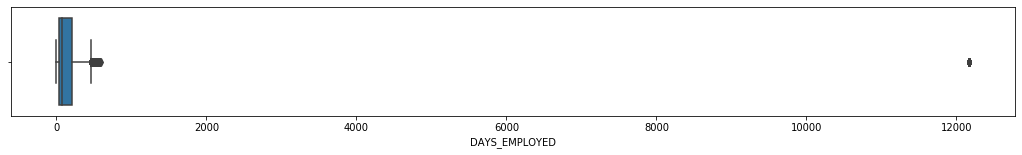

In [513]:
plt.figure(figsize=(18,2))
sns.boxplot(T0.DAYS_EMPLOYED)
plt.show()

In [514]:
T0.DAYS_EMPLOYED.quantile([0.5,0.7,0.9,0.95,0.99,0.995,1.00])

0.500       76.0
0.700      154.0
0.900    12174.0
0.950    12174.0
0.990    12174.0
0.995    12174.0
1.000    12174.0
Name: DAYS_EMPLOYED, dtype: float64

In [500]:
T1.DAYS_EMPLOYED.describe()#Here median is 48 whereas mean is too high at 1519.Also from 75percentile to Max its a huge jump 
#from 109 to 12174 indiactes the existence and influence of outliers

count    24825.000000
mean      1519.059577
std       3943.351320
min          0.000000
25%         22.000000
50%         48.000000
75%        109.000000
max      12174.000000
Name: DAYS_EMPLOYED, dtype: float64

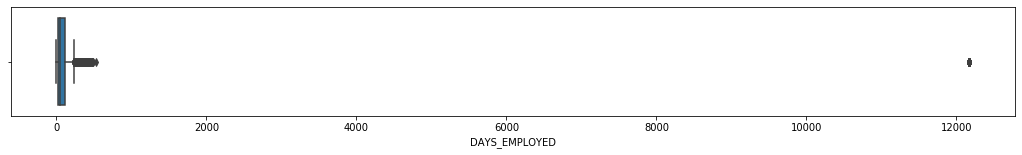

In [501]:
plt.figure(figsize=(18,2))
sns.boxplot(T1.DAYS_EMPLOYED)
plt.show()

In [503]:
T1.DAYS_EMPLOYED.quantile([0.5,0.7,0.9,0.95,0.99,0.995,1.00])

0.500       48.0
0.700       91.0
0.900    12174.0
0.950    12174.0
0.990    12174.0
0.995    12174.0
1.000    12174.0
Name: DAYS_EMPLOYED, dtype: float64

**BIVARIATE ANALYSIS**

<Figure size 720x144 with 0 Axes>

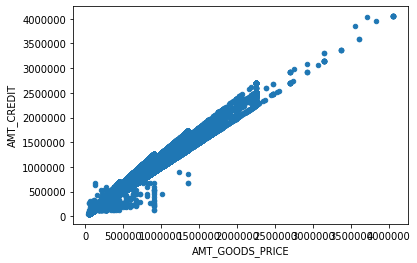

In [504]:
#Numerical-Numerical
#AMT_CREDIT VS AMT_GOODS_PRICE---From the below graph we can inder that with increase in the price of goods the amount of credit
#also increase.
plt.figure(figsize=(10,2))
T0.plot.scatter(x="AMT_GOODS_PRICE",y="AMT_CREDIT")
plt.show()

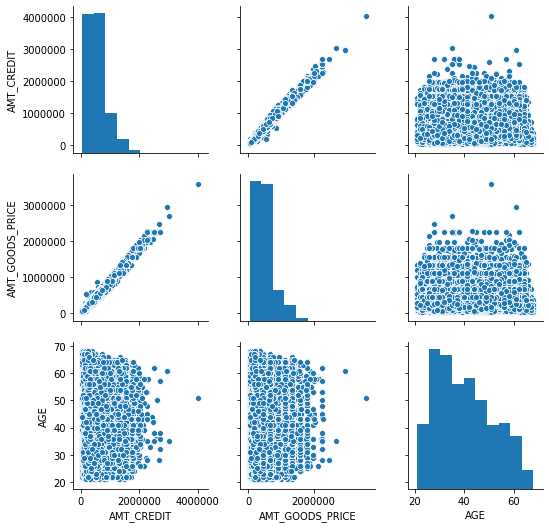

In [515]:
sns.pairplot(data=T1,vars=['AMT_CREDIT','AMT_GOODS_PRICE','AGE'])
plt.show()
#From the below graph we cannot infer any specific insight amongst the three variables we have taken for evaluation here.

**CORRELATION-HEATMAP**

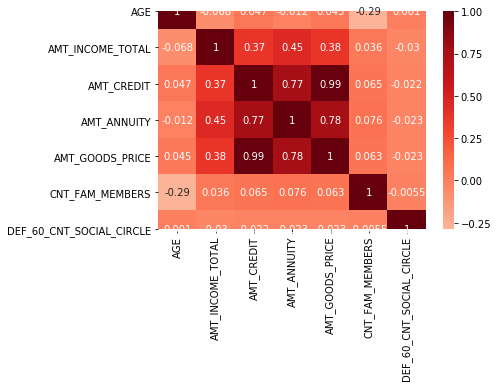

In [600]:
sns.heatmap(T0[["AGE","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","CNT_FAM_MEMBERS","DEF_60_CNT_SOCIAL_CIRCLE"]].corr(),annot=True,cmap="Reds",center=0.118)
plt.show()
#From the below heat map we are not getting any strong correlation amongst the three variables we ahve considered.

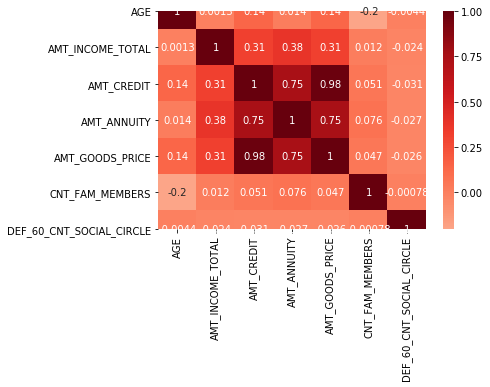

In [599]:

sns.heatmap(T1[["AGE","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","CNT_FAM_MEMBERS","DEF_60_CNT_SOCIAL_CIRCLE"]].corr(),annot=True,cmap="Reds",center=0.118)
plt.show()
#From the below heat map we are not getting any strong correlation amongst the three variables we ahve considered.

In [518]:
#Categorical-Numerical

#AMT_INCOME_TOTAL vs NAME_INCOME_TYPE
#We can conclude that Businessman category has the highest average income amongst all categories in T0 and they are NOT 
#likely to be defaulted as that category doesn't exist in T1 dataset
T0.groupby("NAME_INCOME_TYPE")['AMT_INCOME_TOTAL'].mean()

NAME_INCOME_TYPE
Businessman             652500.000000
Commercial associate    203808.001146
Maternity leave         195000.000000
Pensioner               136449.361318
State servant           180655.430487
Student                 170500.000000
Unemployed              132557.142857
Working                 163069.102428
Name: AMT_INCOME_TOTAL, dtype: float64

In [519]:
T0.groupby("NAME_INCOME_TYPE")['AMT_INCOME_TOTAL'].median()

NAME_INCOME_TYPE
Businessman             495000.0
Commercial associate    180000.0
Maternity leave         135000.0
Pensioner               117000.0
State servant           157500.0
Student                 157500.0
Unemployed              101250.0
Working                 135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

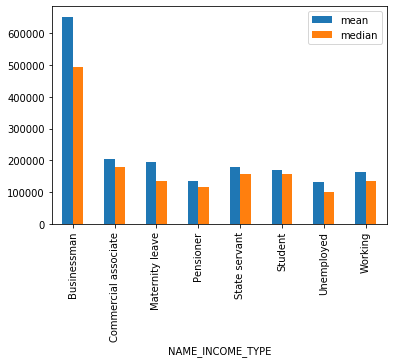

In [526]:
T0.groupby("NAME_INCOME_TYPE")['AMT_INCOME_TOTAL'].aggregate(["mean","median"]).plot.bar()
plt.show()

In [524]:
T1.groupby("NAME_INCOME_TYPE")['AMT_INCOME_TOTAL'].mean()

NAME_INCOME_TYPE
Commercial associate    188217.323228
Maternity leave          58500.000000
Pensioner               135556.940644
State servant           164713.352282
Unemployed               72000.000000
Working                 156287.200342
Name: AMT_INCOME_TOTAL, dtype: float64

In [525]:
T1.groupby("NAME_INCOME_TYPE")['AMT_INCOME_TOTAL'].median()

NAME_INCOME_TYPE
Commercial associate    157500.0
Maternity leave          58500.0
Pensioner               121500.0
State servant           148500.0
Unemployed               65250.0
Working                 135000.0
Name: AMT_INCOME_TOTAL, dtype: float64

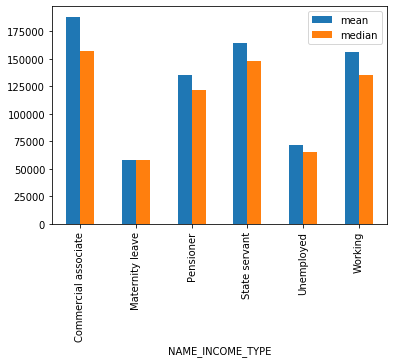

In [527]:
T1.groupby("NAME_INCOME_TYPE")['AMT_INCOME_TOTAL'].aggregate(["mean","median"]).plot.bar()
plt.show()

In [528]:
T0.OCCUPATION_TYPE.value_counts()

Laborers                 49348
Sales staff              29010
Core staff               25832
Managers                 20043
Drivers                  16496
High skill tech staff    10679
Accountants               9339
Medicine staff            7965
Security staff            5999
Cooking staff             5325
Cleaning staff            4206
Private service staff     2477
Low-skill Laborers        1734
Secretaries               1213
Waiters/barmen staff      1196
Realty agents              692
HR staff                   527
IT staff                   492
Name: OCCUPATION_TYPE, dtype: int64

In [533]:
#Categorical-Categorical
#FLAG_OWN_CAR vs NAME_FAMILY_STATUS
#We can see that on both the cases (all other cases and likely default)Applicants with Married status owns the higher percentage
#of CAR

T0.groupby("NAME_FAMILY_STATUS")['FLAG_OWN_CAR'].mean()

NAME_FAMILY_STATUS
Civil marriage          0.300216
Married                 0.396471
Separated               0.231846
Single / not married    0.270769
Unknown                 0.000000
Widow                   0.109762
Name: FLAG_OWN_CAR, dtype: float64

In [555]:
T0.groupby("NAME_FAMILY_STATUS")['FLAG_OWN_CAR'].sum()

NAME_FAMILY_STATUS
Civil marriage           8050
Married                 71992
Separated                4208
Single / not married    11098
Unknown                     0
Widow                    1663
Name: FLAG_OWN_CAR, dtype: int64

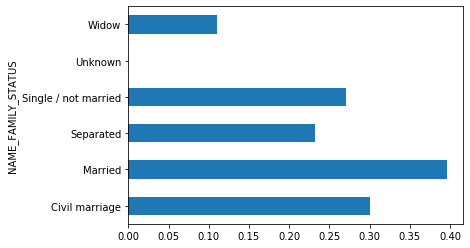

In [534]:
T0.groupby("NAME_FAMILY_STATUS")['FLAG_OWN_CAR'].mean().plot.barh()
plt.show()

In [535]:
T1.groupby("NAME_FAMILY_STATUS")['FLAG_OWN_CAR'].mean()

NAME_FAMILY_STATUS
Civil marriage          0.266802
Married                 0.354074
Separated               0.214815
Single / not married    0.246354
Widow                   0.087513
Name: FLAG_OWN_CAR, dtype: float64

In [556]:
T1.groupby("NAME_FAMILY_STATUS")['FLAG_OWN_CAR'].sum()

NAME_FAMILY_STATUS
Civil marriage           790
Married                 5258
Separated                348
Single / not married    1098
Widow                     82
Name: FLAG_OWN_CAR, dtype: int64

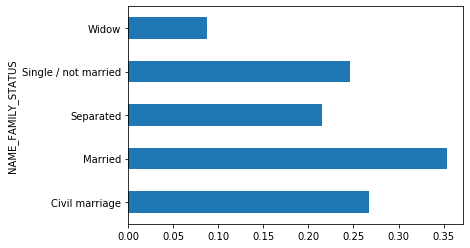

In [541]:
T1.groupby("NAME_FAMILY_STATUS")['FLAG_OWN_CAR'].mean().plot.barh()
plt.show()

In [537]:
#Categorical-Categorical
#FLAG_OWN_REALTY vs NAME_FAMILY_STATUS
T0.groupby("NAME_FAMILY_STATUS")['FLAG_OWN_REALTY'].mean()


NAME_FAMILY_STATUS
Civil marriage          0.693667
Married                 0.700356
Separated               0.681377
Single / not married    0.650353
Unknown                 1.000000
Widow                   0.761138
Name: FLAG_OWN_REALTY, dtype: float64

In [554]:
T0.groupby("NAME_FAMILY_STATUS")['FLAG_OWN_REALTY'].sum()

NAME_FAMILY_STATUS
Civil marriage           18600
Married                 127172
Separated                12367
Single / not married     26656
Unknown                      2
Widow                    11532
Name: FLAG_OWN_REALTY, dtype: int64

In [552]:
T1.groupby("NAME_FAMILY_STATUS")['FLAG_OWN_REALTY'].mean()

NAME_FAMILY_STATUS
Civil marriage          0.686255
Married                 0.693603
Separated               0.669753
Single / not married    0.638770
Widow                   0.767343
Name: FLAG_OWN_REALTY, dtype: float64

In [553]:
T1.groupby("NAME_FAMILY_STATUS")['FLAG_OWN_REALTY'].sum()

NAME_FAMILY_STATUS
Civil marriage           2032
Married                 10300
Separated                1085
Single / not married     2847
Widow                     719
Name: FLAG_OWN_REALTY, dtype: int64

**Merge application_data and previous_application**

In [572]:
#Importing previous applicant's data set
prev = pd.read_csv(".//previous_application.csv")
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [574]:
prev.shape

(1670214, 37)

In [575]:
prev.sort_values("SK_ID_CURR",inplace=True)
prev.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.50,23787.0,2520.00,24835.50,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.00,179055.0,0.00,179055.00,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.00,1035882.0,NaN,900000.00,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.00,348637.5,0.00,337500.00,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.50,68053.5,6885.00,68809.50,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
935548,1564014,100004,Consumer loans,5357.250,24282.00,20106.0,4860.00,24282.00,FRIDAY,5,Y,1,0.212008,NaN,NaN,XAP,Approved,-815,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
1259112,1857999,100005,Cash loans,NaN,0.00,0.0,NaN,NaN,FRIDAY,10,Y,1,NaN,NaN,NaN,XNA,Canceled,-315,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
1378978,2495675,100005,Consumer loans,4813.200,44617.50,40153.5,4464.00,44617.50,THURSDAY,11,Y,1,0.108964,NaN,NaN,XAP,Approved,-757,Cash through the bank,XAP,NaN,New,Mobile,POS,XNA,Country-wide,37,Connectivity,12.0,high,POS mobile with interest,365243.0,-706.0,-376.0,-466.0,-460.0,0.0
900957,1489396,100006,Revolving loans,13500.000,270000.00,270000.0,NaN,270000.00,THURSDAY,15,Y,1,NaN,NaN,NaN,XAP,Approved,-181,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
1607443,1697039,100006,Cash loans,32696.100,688500.00,906615.0,NaN,688500.00,THURSDAY,15,Y,1,NaN,NaN,NaN,XNA,Refused,-181,Cash through the bank,LIMIT,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,48.0,low_normal,Cash X-Sell: low,NaN,NaN,NaN,NaN,NaN,NaN


In [576]:
#renaming the columns in previous dataframe
prev.rename(columns={'AMT_APPLICATION':'AMT_CREDIT_REQUESTED'}, inplace=True)
prev.rename(columns={'AMT_CREDIT':'AMT_CREDIT_GRANTED'}, inplace=True)
prev.rename(columns={'AMT_ANNUITY':'AMT_ANNUITY_PREV'}, inplace=True)
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY_PREV,AMT_CREDIT_REQUESTED,AMT_CREDIT_GRANTED,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
201668,1369693,100001,Consumer loans,3951.000,24835.5,23787.0,2520.0,24835.5,FRIDAY,13,Y,1,0.104326,NaN,NaN,XAP,Approved,-1740,Cash through the bank,XAP,Family,Refreshed,Mobile,POS,XNA,Country-wide,23,Connectivity,8.0,high,POS mobile with interest,365243.0,-1709.0,-1499.0,-1619.0,-1612.0,0.0
892077,1038818,100002,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
575941,1810518,100003,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1021650,2636178,100003,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
1223745,2396755,100003,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,XAP,Approved,-2341,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0


In [577]:
#checking whether the customer had applied for the loan earlier or the first time.
prev1 = prev[["SK_ID_PREV","SK_ID_CURR","NAME_CLIENT_TYPE"]]
prev1.head(30)

,SK_ID_PREV,SK_ID_CURR,NAME_CLIENT_TYPE
201668,1369693,100001,Refreshed
892077,1038818,100002,New
575941,1810518,100003,Repeater
1021650,2636178,100003,Refreshed
1223745,2396755,100003,Refreshed
935548,1564014,100004,New
1259112,1857999,100005,Repeater
1378978,2495675,100005,New
900957,1489396,100006,Repeater
1607443,1697039,100006,Repeater


In [579]:
#Merging both the current and previous application dataframes based on the common column 
merged_df1= pd.merge(df1,prev,left_on='SK_ID_CURR',right_on='SK_ID_CURR',how = "outer",suffixes=('_curr', '_prev'))
merged_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_curr,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_curr,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,ORGANIZATION_TYPE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AGE,AGE_BINNED,SK_ID_PREV,NAME_CONTRACT_TYPE_prev,AMT_ANNUITY_PREV,AMT_CREDIT_REQUESTED,AMT_CREDIT_GRANTED,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_prev,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1.0,Cash loans,M,0.0,1.0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461.0,21.0,-2120.0,1.0,Laborers,1.0,2.0,Business Entity Type 3,2.0,0.0,0.0,0.0,25.0,"(19, 29]",1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0.0,Cash loans,F,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765.0,39.0,-291.0,1.0,Core staff,2.0,1.0,School,0.0,0.0,0.0,0.0,45.0,"(39, 49]",1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0.0,Cash loans,F,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765.0,39.0,-291.0,1.0,Core staff,2.0,1.0,School,0.0,0.0,0.0,0.0,45.0,"(39, 49]",2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0.0,Cash loans,F,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765.0,39.0,-291.0,1.0,Core staff,2.0,1.0,School,0.0,0.0,0.0,0.0,45.0,"(39, 49]",2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0.0,Revolving loans,M,1.0,1.0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046.0,7.0,-2531.0,1.0,Laborers,1.0,2.0,Government,0.0,0.0,0.0,0.0,52.0,"(49, 59]",1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,NaN,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [580]:
merged_df1.shape

(1686668, 64)

In [581]:
#checking the current applicant's previous loans contract type and status from the merged df parameters.
merged_df1_ID = merged_df1[['SK_ID_CURR','SK_ID_PREV','TARGET','NAME_CONTRACT_TYPE_curr','NAME_CONTRACT_TYPE_prev','AMT_GOODS_PRICE_curr','AMT_GOODS_PRICE_prev','NAME_CONTRACT_STATUS']]
merged_df1_ID.head(50)

,SK_ID_CURR,SK_ID_PREV,TARGET,NAME_CONTRACT_TYPE_curr,NAME_CONTRACT_TYPE_prev,AMT_GOODS_PRICE_curr,AMT_GOODS_PRICE_prev,NAME_CONTRACT_STATUS
0,100002,1038818.0,1.0,Cash loans,Consumer loans,351000.0,179055.00,Approved
1,100003,1810518.0,0.0,Cash loans,Cash loans,1129500.0,900000.00,Approved
2,100003,2636178.0,0.0,Cash loans,Consumer loans,1129500.0,337500.00,Approved
3,100003,2396755.0,0.0,Cash loans,Consumer loans,1129500.0,68809.50,Approved
4,100004,1564014.0,0.0,Revolving loans,Consumer loans,135000.0,24282.00,Approved
5,100006,1489396.0,0.0,Cash loans,Revolving loans,297000.0,270000.00,Approved
6,100006,1697039.0,0.0,Cash loans,Cash loans,297000.0,688500.00,Refused
7,100006,1243599.0,0.0,Cash loans,Cash loans,297000.0,NaN,Canceled
8,100006,2190416.0,0.0,Cash loans,Consumer loans,297000.0,334917.00,Approved
9,100006,2827850.0,0.0,Cash loans,Revolving loans,297000.0,NaN,Canceled
